In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from regression2_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy
np.set_printoptions(formatter={'float': lambda x: format(x, '6.3f')}) # настройка вывода для матриц

# Нормализация данных

Рассмотрим пример, в котором параметры линейной функции заранее известны.

Пусть данные получены от функции
$$y = f(x_1, x_2) = - 1 + x_1 + 2x_2$$

Это функция вида:

$y = f(x_1, x_2) = \theta_0 + \theta_1x_1 + \theta_2x_2 $, 

где  $\theta_0=-1$, $\theta_1 = 1$, $\theta_2=2 $

Сгенерируем данные.

In [3]:
X1 = np.random.uniform(1, 10, 1000)
X2 = np.random.uniform(0, 1, 1000)
X = np.column_stack([X1, X2])
X = add_ones(X)

У $X1$ диапозон от 1 до 10, а у $X2$ в десять раз меньше - от 0 до 1.

In [4]:
print(X)

[[ 1.000  5.006  0.991]
 [ 1.000  3.681  0.495]
 [ 1.000  4.558  0.233]
 ...
 [ 1.000  9.783  0.287]
 [ 1.000  4.753  0.483]
 [ 1.000  4.423  0.580]]


In [5]:
real_theta = np.array([-1, 1, 2])
y = linear_function(X, real_theta)

In [6]:
print(MSE_Loss(X, real_theta, y))

0.0


In [7]:
print(real_theta)

[-1  1  2]


## Значения парамететров во время градиентного спуска 

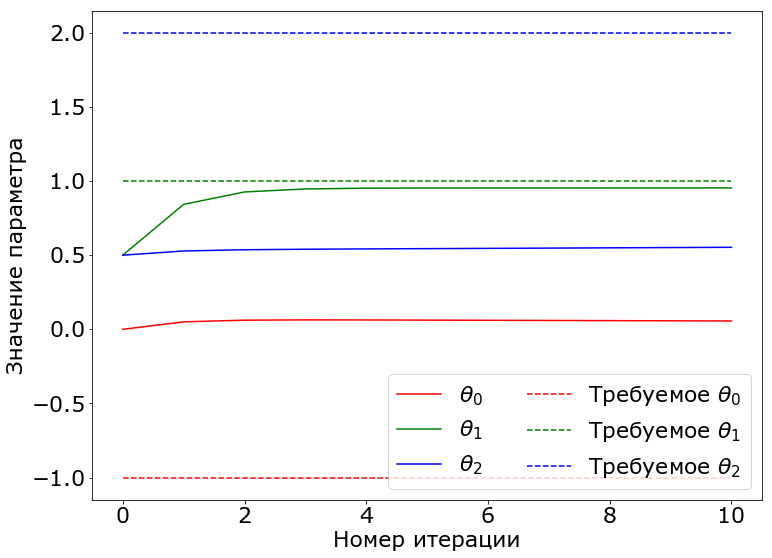

In [8]:
theta_init = np.array([0, 0.5, 0.5])
plot_thetas_values(theta_init, X, y, real_theta, iters=10, alpha=0.01)

Увеличим коэффициент скорости обучения.

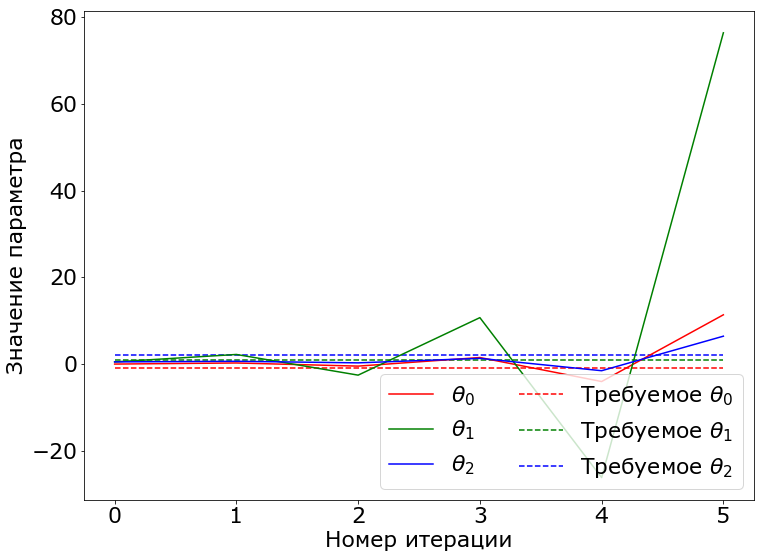

In [9]:
theta_init = np.array([0, 0.5, 0.5])
plot_thetas_values(theta_init, X, y, real_theta, iters=5, alpha=0.05)

Увеличим количество итераций алгоритма.

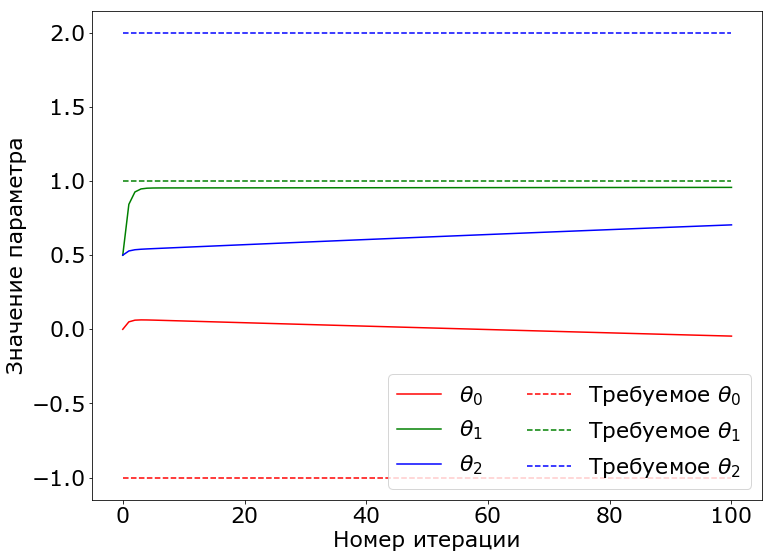

In [10]:
plot_thetas_values(theta_init, X, y, real_theta, iters=100, alpha=0.01)

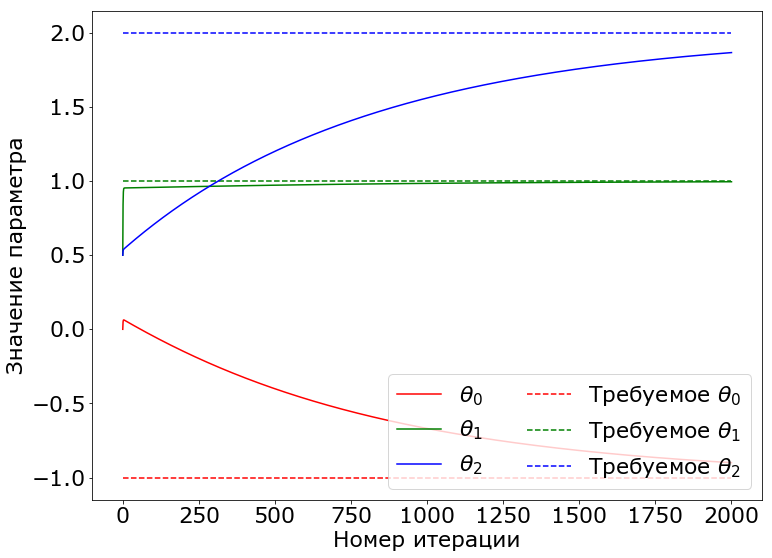

In [11]:
plot_thetas_values(theta_init, X, y, real_theta, iters=2000, alpha=0.01)

За 2000 итераций $\theta_1$ сошелся к нужному значению, но другие параметры нет. 

## Почему так?

При подсчете производной параметра происходит умножение на соответствующее значение $x_j$. 

$$\dfrac{\partial Loss(\Theta)}{\partial \theta_j} = \dfrac{2}{N} \sum_{i=1}^{N}(X_i\Theta - y_i) x_{ij}$$

При больших значениях $x_j$ производная может быть слишком большой и для сходимости градиентного спуска нужно будет выбрать маленькую скорость обучения (параметр $alpha$).

При этом, остальные параметры могут начать сходится медленнее.

При маленьких значениях $x_j$ производная может быть слишком маленькой и для сходимости градиентного спуска нужно будет выбрать большую скорость обучения.

При этом, остальные параметры могут начать расходится.

## Нормализация

Что бы решить эту проблему нужно привести данные к одному диапазону. То есть, нормализовать данные.

Это можно решить с помощью **стандартизации**.

Для каждой колонки или параметра (часто ее называют фича) нужно посчитать ее математическое ожидание (или среднее значение) и стандартное отклонение (среднеквадратическое отклонение). 

Затем нужно из каждого элемента столбца вычесть среднее и поделить это на стандартное отклонение.

Пусть $X$ - вектор-столбец матрицы данных. $x_i$ - это $i$ элемент вектора.

* Среднее значение (мат. ожидание) вектора $X$: $E[X] = \dfrac{1}{N}\sum_i^NX_i$

* Дисперсия: $D[X] = E[ (X - E[X])^2] = \dfrac{1}{N}\sum_i^N (X_i - E[X])^2$

* Стандартное отклонение: $\sigma_X = \sqrt{D(X)}$

Тогда стандартизация - это:

$X_{s}= \dfrac{X - E(X)}{\sqrt{D(X)}} = \dfrac{X - E(X)}{\sigma_X}$

## Реализация стардартизации

In [12]:
means = X.mean(axis=0)
stds = X.std(axis=0)

In [13]:
print(means, stds)

[ 1.000  5.485  0.514] [ 0.000  2.585  0.287]


In [14]:
X_s = X.copy()

In [15]:
for i in range(1, X_s.shape[1]):
    X_s[:, i] = (X_s[:, i] - means[i]) / stds[i]
print(X_s)

[[ 1.000 -0.185  1.666]
 [ 1.000 -0.698 -0.067]
 [ 1.000 -0.359 -0.979]
 ...
 [ 1.000  1.663 -0.791]
 [ 1.000 -0.283 -0.108]
 [ 1.000 -0.411  0.231]]


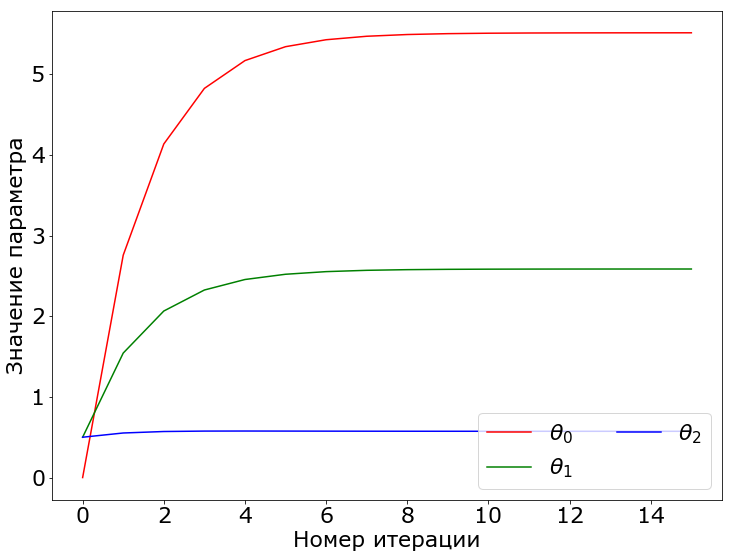

In [16]:
plot_thetas_values(theta_init, X_s, y, None, iters=15, alpha=0.25)

Были получены другие значения для $\Theta$. Покажем, что они также подходят для нашей задачи.

In [18]:
theta_pred = grad_descent(X_s, y, theta_init, iters=15, alpha=0.25)

In [19]:
y_pred_from_normalized = linear_function(X_s, theta_pred)

In [20]:
y_pred_from_oroginal = linear_function(X, real_theta)

In [21]:
print(mean_squared_error(y_pred_from_normalized, y_pred_from_oroginal))

3.259988845396405e-08


## StandardScaler

In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(X)
X_n = scaler.transform(X)
#X_n = scaler.fit_transform(X)

In [25]:
print(X)

[[ 1.000  5.006  0.991]
 [ 1.000  3.681  0.495]
 [ 1.000  4.558  0.233]
 ...
 [ 1.000  9.783  0.287]
 [ 1.000  4.753  0.483]
 [ 1.000  4.423  0.580]]


In [26]:
print(X_n)

[[ 0.000 -0.185  1.666]
 [ 0.000 -0.698 -0.067]
 [ 0.000 -0.359 -0.979]
 ...
 [ 0.000  1.663 -0.791]
 [ 0.000 -0.283 -0.108]
 [ 0.000 -0.411  0.231]]


In [27]:
print(scaler.mean_, means)
print(scaler.mean_ - means)

[ 1.000  5.485  0.514] [ 1.000  5.485  0.514]
[ 0.000  0.000  0.000]


In [28]:
print(scaler.scale_, stds)
print(scaler.scale_ - stds)

[ 1.000  2.585  0.287] [ 0.000  2.585  0.287]
[ 1.000  0.000  0.000]
